In [51]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Conv2D, Dropout, MaxPooling2D, Flatten, Dense

In [52]:
import numpy as np
import matplotlib.pyplot as plt

In [53]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [54]:
train_images.shape

(60000, 28, 28)

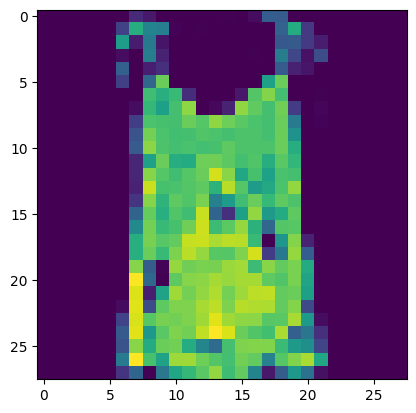

In [55]:
plt.imshow(train_images[67])

In [56]:
train_images = train_images.astype('float32') / 255

In [57]:
test_images = test_images.astype('float32') / 255

In [58]:
train_images = train_images.reshape(train_images.shape[0], 28,28,1)
test_images = test_images.reshape(test_images.shape[0], 28,28,1)

In [59]:
test_images.shape

(10000, 28, 28, 1)

In [60]:
train_labels[50]

3

In [61]:
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

In [62]:
train_labels.shape

(60000, 10)

## Modelos de Datos

In [63]:
model = tf.keras.models.Sequential()
model.add(Conv2D(filters = 64, kernel_size = 2, padding = 'same', activation = 'relu',
                input_shape = (28,28,1)))
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.3))
model.add(Conv2D(filters = 32, kernel_size = 2, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation = 'softmax'))


In [64]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 28, 28, 64)        320       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 14, 14, 32)        8224      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 dropout_9 (Dropout)         (None, 7, 7, 32)         

## Compilar - Entrenar

In [65]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'rmsprop',metrics = ['accuracy'])

In [66]:
model.fit(train_images, train_labels, batch_size = 64, epochs = 10)

Epoch 1/10
938/938 [==============================] - 41s 42ms/step - loss: 0.5479 - accuracy: 0.7995
Epoch 2/10
938/938 [==============================] - 39s 42ms/step - loss: 0.3710 - accuracy: 0.8648
Epoch 3/10
938/938 [==============================] - 39s 41ms/step - loss: 0.3296 - accuracy: 0.8798
Epoch 4/10
938/938 [==============================] - 39s 41ms/step - loss: 0.3070 - accuracy: 0.8891
Epoch 5/10
938/938 [==============================] - 39s 41ms/step - loss: 0.2928 - accuracy: 0.8937
Epoch 6/10
938/938 [==============================] - 39s 42ms/step - loss: 0.2793 - accuracy: 0.8980
Epoch 7/10
938/938 [==============================] - 38s 41ms/step - loss: 0.2691 - accuracy: 0.9026
Epoch 8/10
938/938 [==============================] - 39s 41ms/step - loss: 0.2669 - accuracy: 0.9033
Epoch 9/10
938/938 [==============================] - 39s 41ms/step - loss: 0.2608 - accuracy: 0.9074
Epoch 10/10
938/938 [==============================] - 39s 42ms/step - loss: 0.258

In [72]:
score = model.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 7ms/step - loss: 0.2434 - accuracy: 0.9125


[0.24339452385902405, 0.9125000238418579]

In [ ]:
score

Con los callbacks podemos ejecutar acciones durante el entrenamiento.
Por ejemplo con EarlyStopping podemos detener el entrenamiento después cierta métrica deje de mejorar
Con monitor = 'accuracy' monitoreamos la precisión y con patience = 1 detenemos el entrenamiento después una vez que deje de mejorar la precisión(accuracy) en 1 época

In [ ]:
early = tf.keras.callbacks.EarlyStopping(monitor = 'accuracy', patience = 1)

In [ ]:
model.fit(train_images, train_labels, batch_size = 64, epochs = 10, callbacks = [early])

Con ModelCheckpoint puedo salvar el mejor modelo con formato hdf5(me guarda los pesos) y con save_best_only = True. 
Cada vez que mejore la métrica que le paso en este caso monitor = 'accuracy' el va a salvar el modelo.
Con verbose = 1 me va avisando durante en el entrenamiento, en cada época si pudo o no mejorar el modelo

In [ ]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath = 'mi_primera_red_conv.hdf5', 
                                                verbose = 1,    
                                                monitor = 'accuracy',
                                                save_best_only = True)

In [ ]:
model.fit(train_images, train_labels, batch_size = 64, epochs = 10, callbacks = [checkpoint])

Si quiero cargar los weigths utilizo el método load_weigths()

In [ ]:
model2 = model
model.load_weigths('./mi_primera_red_conv.hdf5')